In [1]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor ,AdaBoostClassifier,AdaBoostRegressor
from sklearn.svm import SVC,SVR
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import load_boston,load_iris,load_diabetes,load_breast_cancer

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [3]:
import pandas as pd
import numpy as np
import plotly as px

In [4]:
from scipy.stats import normaltest,kstest,shapiro
# import statistics.stats as sts

import statsmodels.api as sm
import scipy.stats as sts

from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=sns.load_dataset('iris')

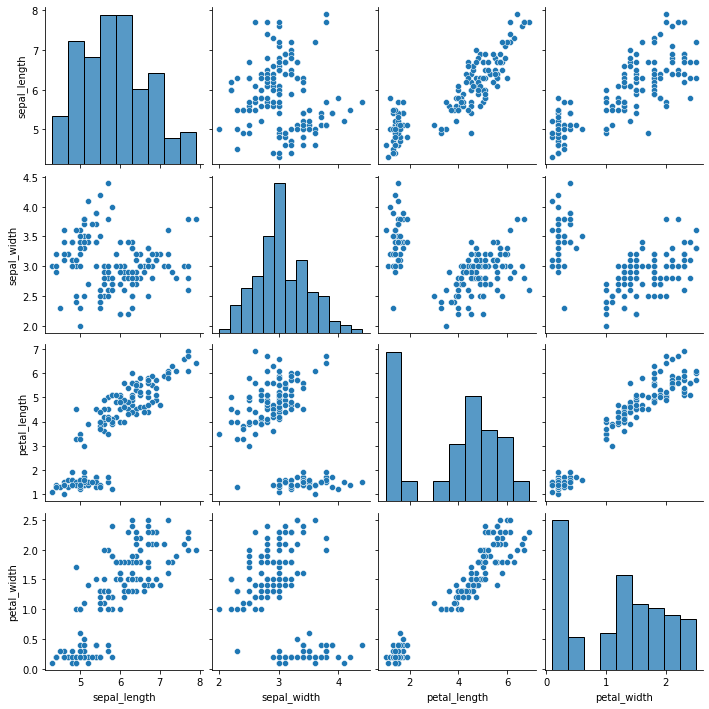

In [7]:
sns.pairplot(df)

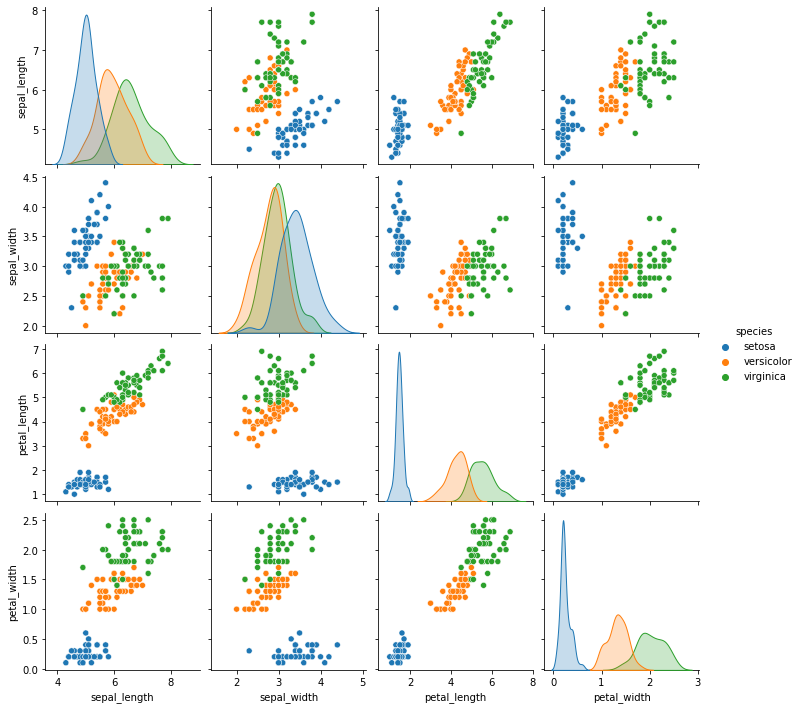

In [8]:
sns.pairplot(df,hue='species')

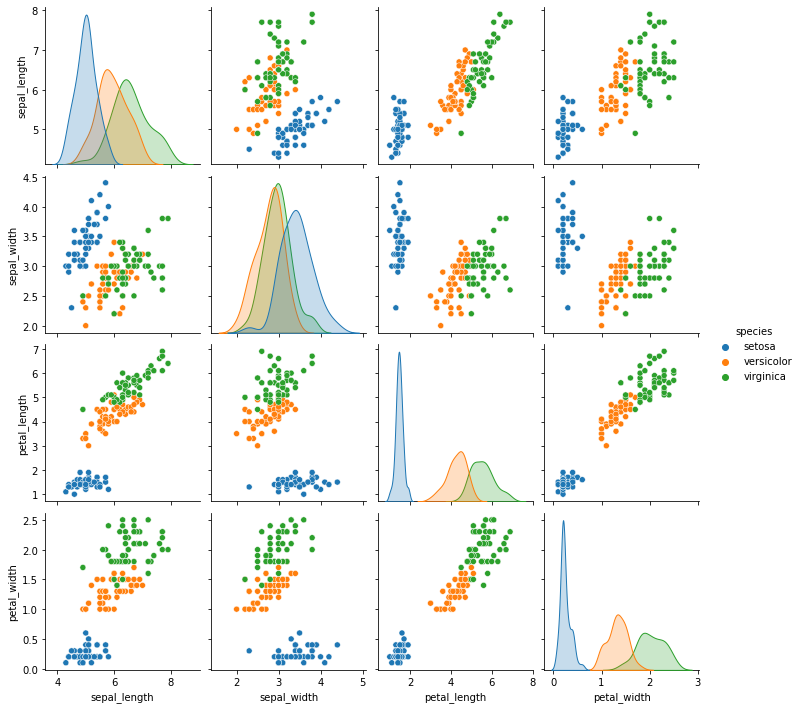

In [9]:
sns.pairplot(df,hue='species',diag_kind='auto')

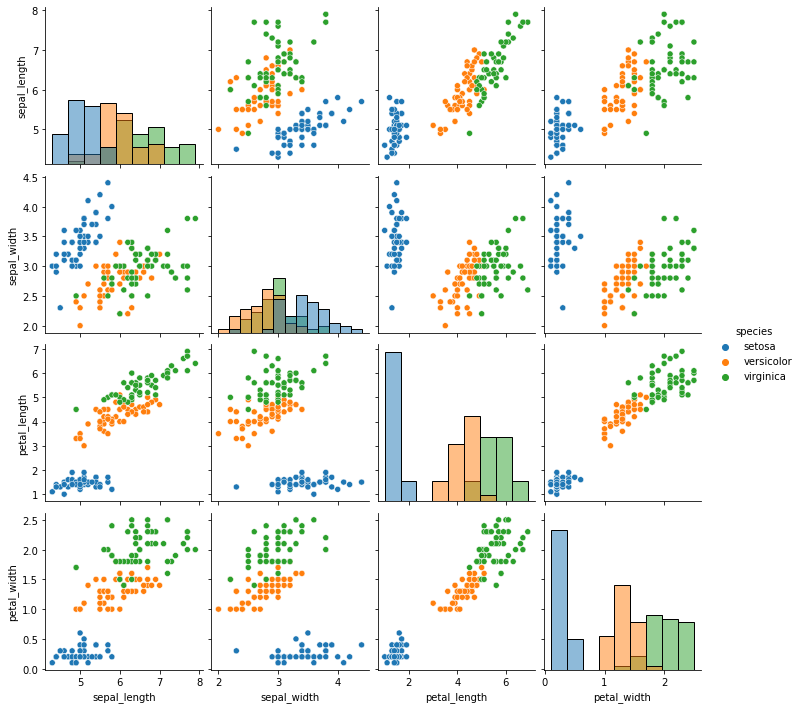

In [10]:
sns.pairplot(df,hue='species',diag_kind='hist')

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

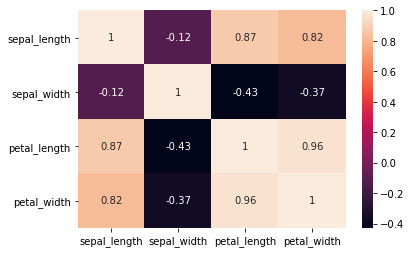

In [13]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

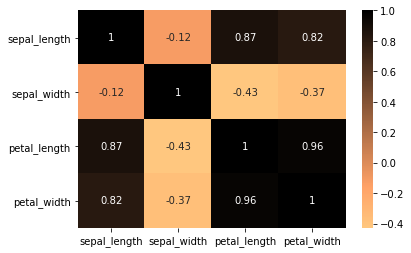

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='copper_r')

In [15]:
df = pd.read_csv(r"D:\PYTHON_NOTES\CSV\iris.csv")

In [16]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
141,142,6.9,3.1,5.1,2.3,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
112,113,6.8,3.0,5.5,2.1,Iris-virginica
13,14,4.3,3.0,1.1,0.1,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa


In [17]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [18]:
df.Id.nunique()

150

In [19]:
df.SepalLengthCm.value_counts().head()

5.0    10
6.3     9
5.1     9
5.7     8
6.7     8
Name: SepalLengthCm, dtype: int64

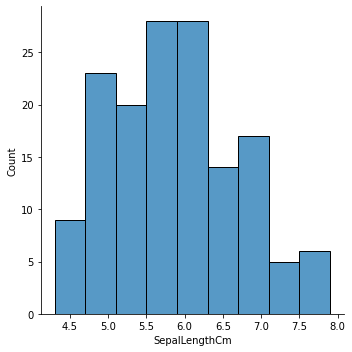

In [20]:
sns.displot(df['SepalLengthCm'])

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

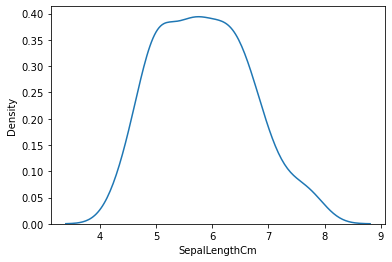

In [21]:
sns.distplot(df['SepalLengthCm'],hist=False)

In [22]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

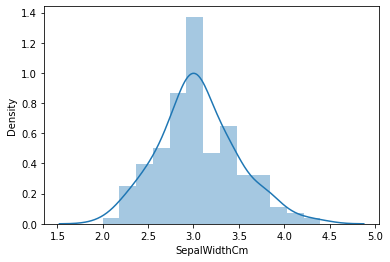

In [23]:
sns.distplot(df.SepalWidthCm)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

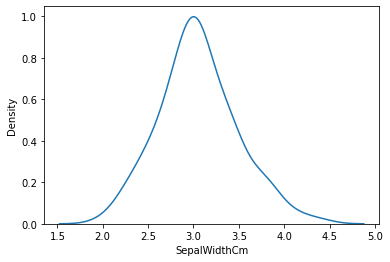

In [24]:
sns.kdeplot(df.SepalWidthCm)

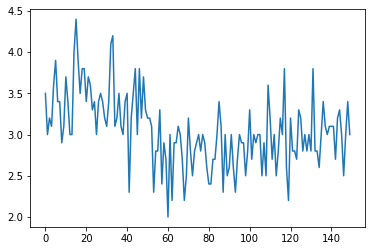

In [25]:
plt.plot(df.SepalWidthCm)

<AxesSubplot:>

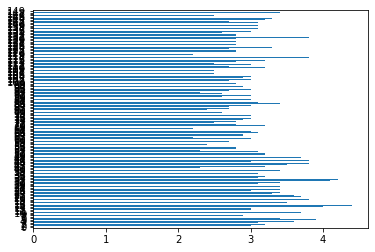

In [26]:
df.SepalWidthCm.plot(kind='barh')

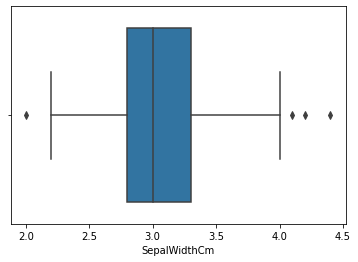

In [27]:
sns.boxplot(df.SepalWidthCm)
plt.show()

<AxesSubplot:>

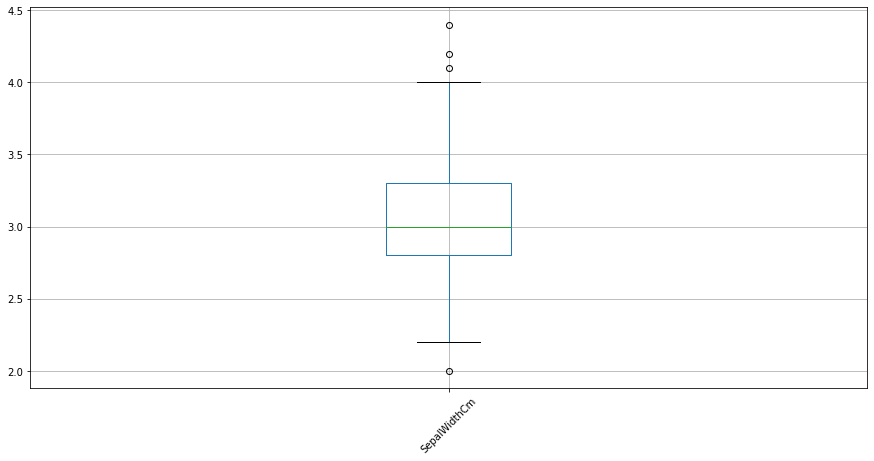

In [28]:
df[['SepalWidthCm']].boxplot(figsize=(15,7),rot=45)

In [29]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [30]:
pd.get_dummies(df.Species)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [31]:
label = LabelEncoder()
df.Species=label.fit_transform(df.Species)

In [32]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [33]:
df[::20]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
20,21,5.4,3.4,1.7,0.2,0
40,41,5.0,3.5,1.3,0.3,0
60,61,5.0,2.0,3.5,1.0,1
80,81,5.5,2.4,3.8,1.1,1
100,101,6.3,3.3,6.0,2.5,2
120,121,6.9,3.2,5.7,2.3,2
140,141,6.7,3.1,5.6,2.4,2


In [34]:
df=df.drop('Id',axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

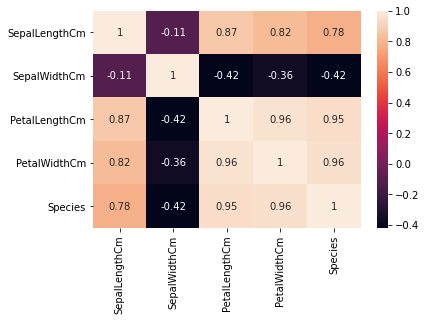

In [35]:
sns.heatmap(df.corr(),annot=True)

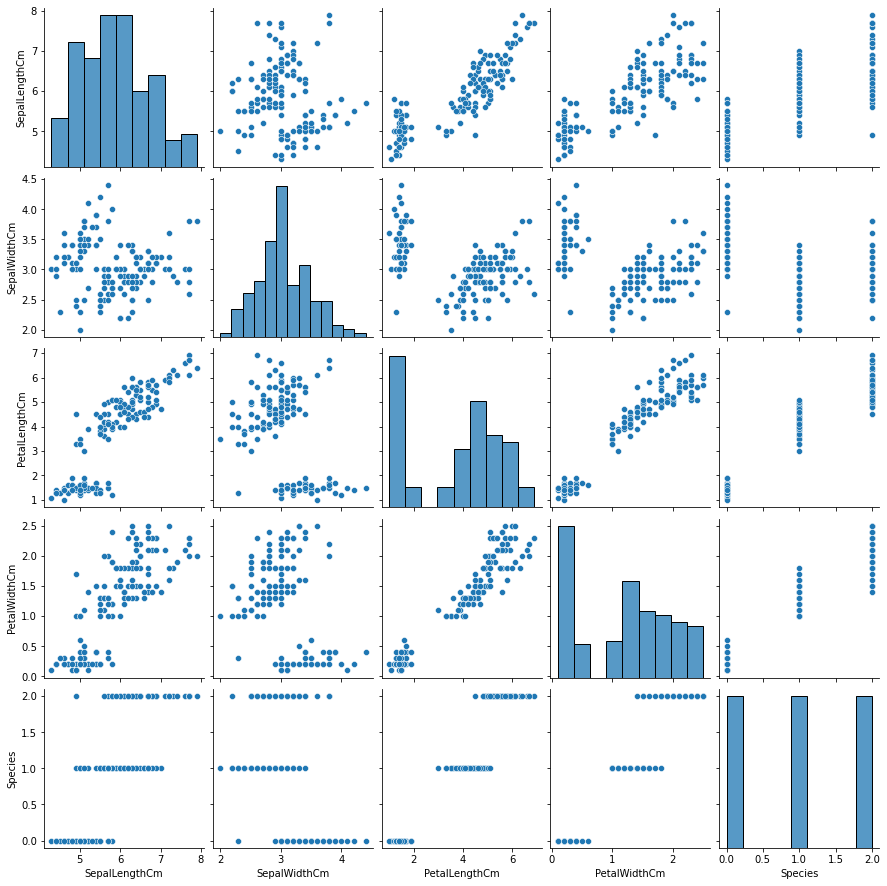

In [36]:
sns.pairplot(df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

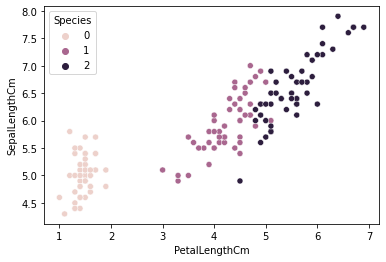

In [37]:
sns.scatterplot(df.PetalLengthCm,df.SepalLengthCm,hue=df.Species)

In [38]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
x=df.drop('Species',axis=1)

In [40]:
vif=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [41]:
vif

[264.7457109493044, 97.1116058338033, 173.96896536339727, 55.48868864572551]

In [42]:
s =pd.Series(vif,index=x.columns)

<AxesSubplot:>

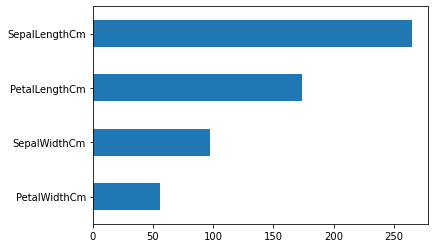

In [43]:
s.sort_values().plot(kind='barh')

In [44]:
y= df.Species

In [45]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

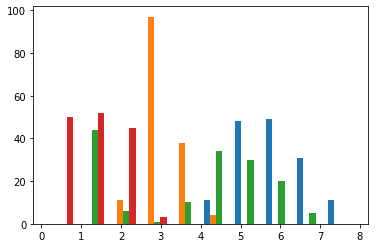

In [46]:
plt.hist(x)
plt.show()

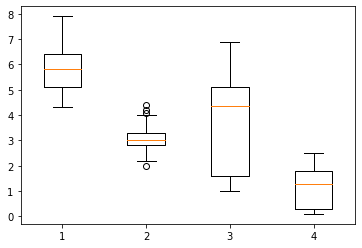

In [47]:
plt.boxplot(x)
plt.show()

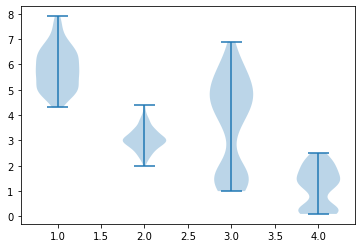

In [48]:
plt.violinplot(x)
plt.show()

In [49]:
np.quantile(x,0.25)

1.7

In [50]:
# plt.Figure(figsize=(60,1),tight_layout={15,15},linewidth=0.1).tight_layout


In [51]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [150]:
df=pd.read_csv(r'D:\PYTHON_NOTES\CSV\autos_dataset.csv')

In [151]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
90,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
77,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189
179,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161,5200,19,24,15998
181,-1,?,toyota,gas,std,four,wagon,rwd,front,104.5,...,161,mpfi,3.27,3.35,9.2,156,5200,19,24,15750
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,10.0,100,5500,26,32,9995


In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [153]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

<AxesSubplot:>

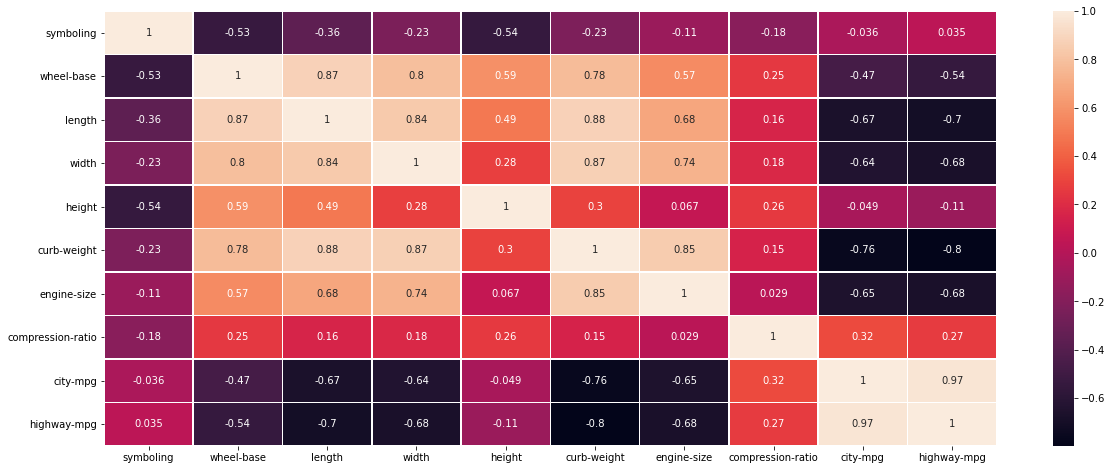

In [154]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,lw=0.5)

In [155]:
num= df.select_dtypes(exclude=object)

In [156]:
num

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


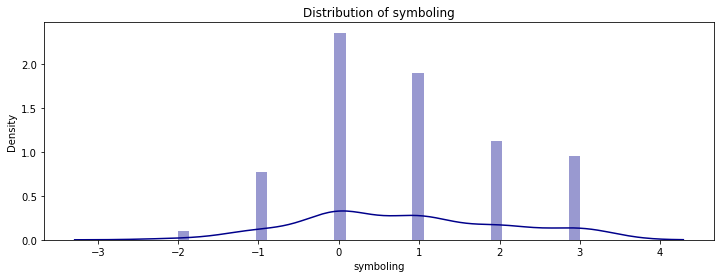

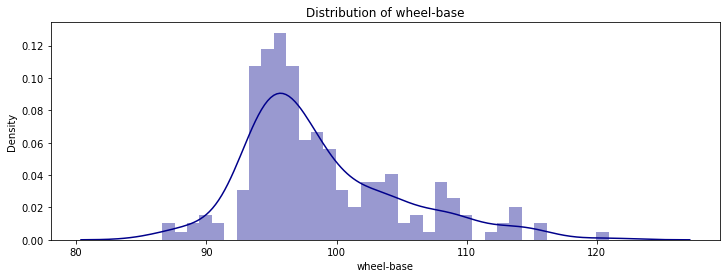

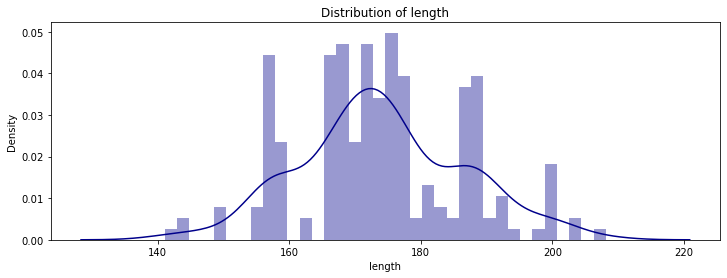

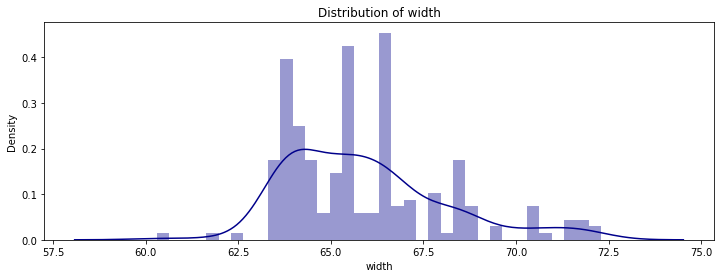

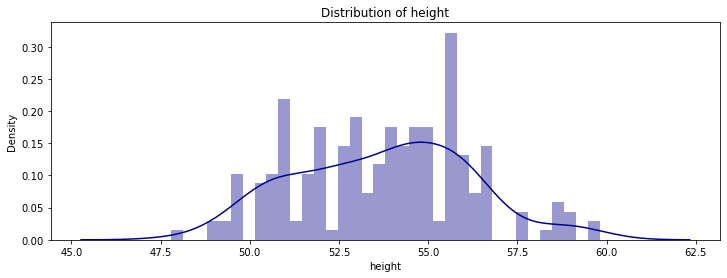

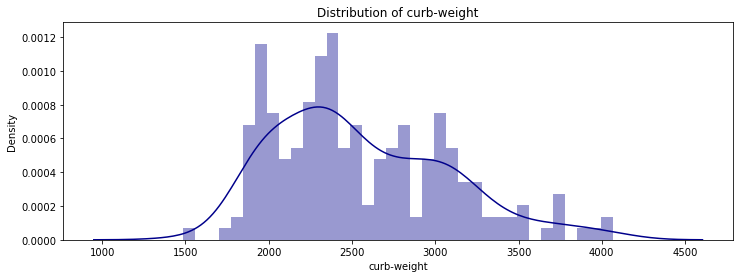

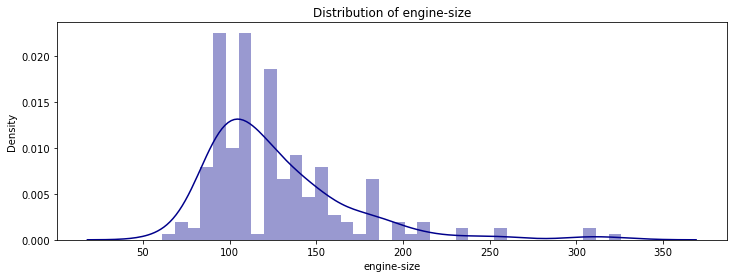

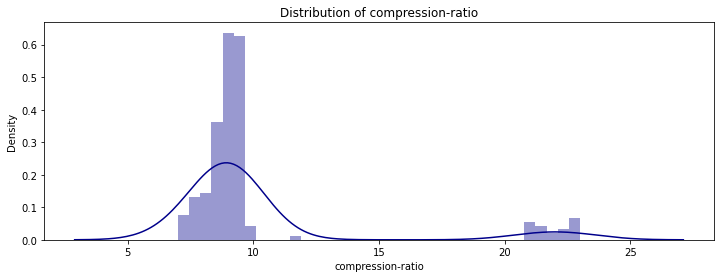

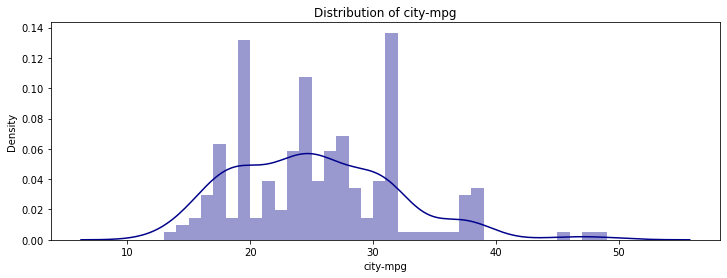

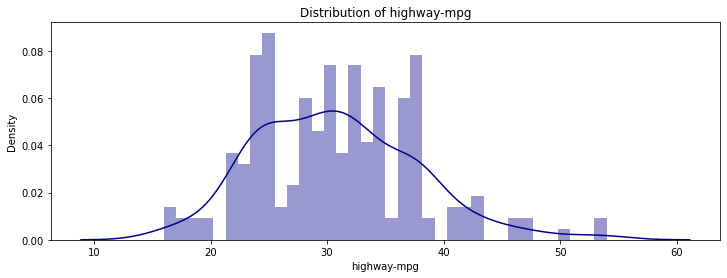

In [157]:
import warnings
warnings.filterwarnings('ignore')

for i in num.columns:
    plt.figure(figsize=(12,4))
    sns.distplot(df[i],bins=int(180/5),color='darkblue')
    plt.title(f"Distribution of {i}")

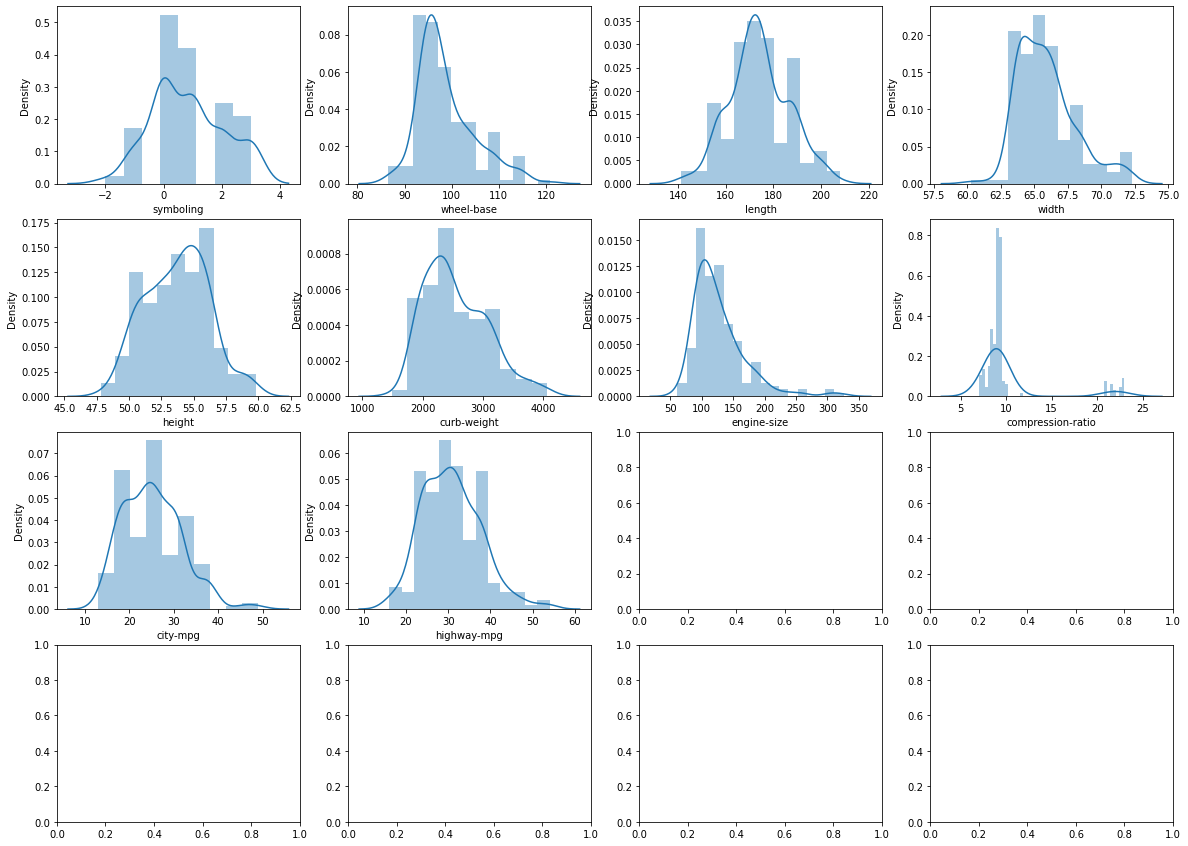

In [158]:
fig,ax=plt.subplots(4,4,figsize=(20,15))
for i,j in zip(num.columns,ax.flatten()):#>>>>>>>>>>>>>>>>>>>distplot
    sns.distplot(num[i],ax=j,label=False)

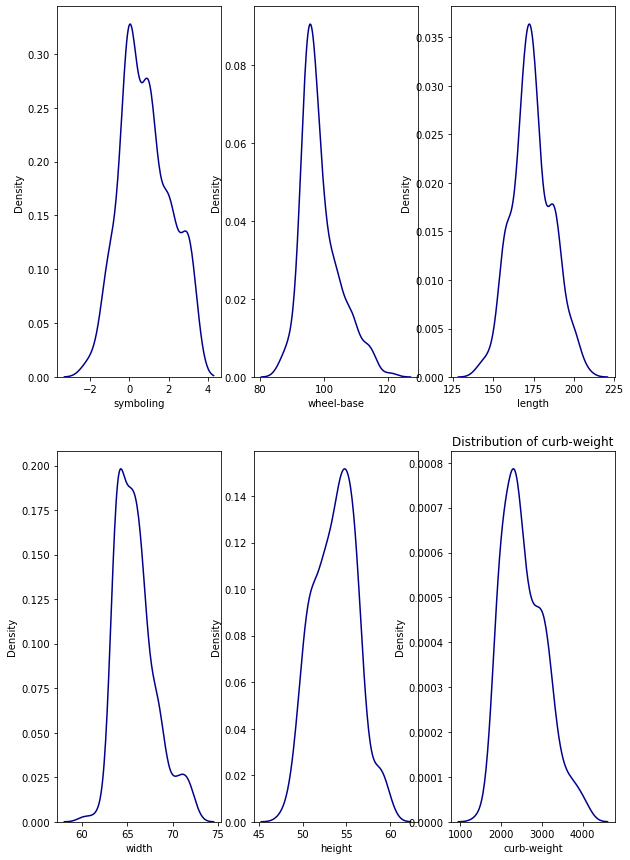

In [159]:
fig,ax = plt.subplots(2,3,figsize=(10,15))
for i,j in zip(num.columns,ax.flatten()):
   
    sns.kdeplot(num[i],ax=j,color='darkblue')
    plt.title(f"Distribution of {i}")
   

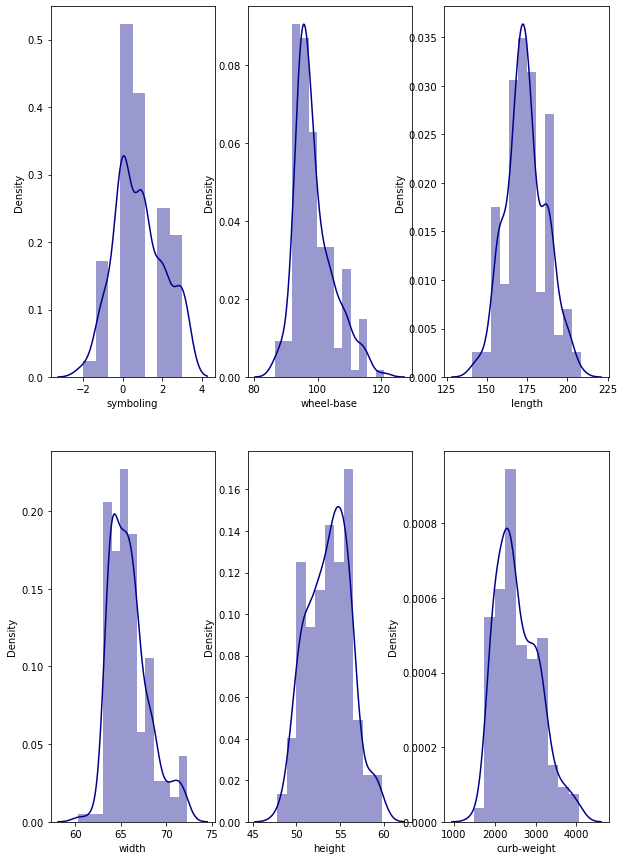

In [160]:
fig,ax = plt.subplots(2,3,figsize=(10,15))
for i,j in zip(num.columns,ax.flatten()):
    sns.distplot(num[i],ax=j,color='darkblue')

In [161]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [162]:
label= LabelEncoder()
lab=label.fit_transform(df['num-of-cylinders'])

In [163]:
lab=pd.DataFrame(lab,columns=['Target'])
lab

,Target
0,2
1,2
2,3
3,2
4,1
...,...
200,2
201,2
202,3
203,3


In [164]:
lab.join(df)

,Target,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,1,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,2,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,3,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,3,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [165]:
pd.concat([df,lab],axis=1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Target
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,2
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,2
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,3
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,2
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,2
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,2
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,3
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.4,23.0,106,4800,26,27,22470,3


In [166]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [167]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


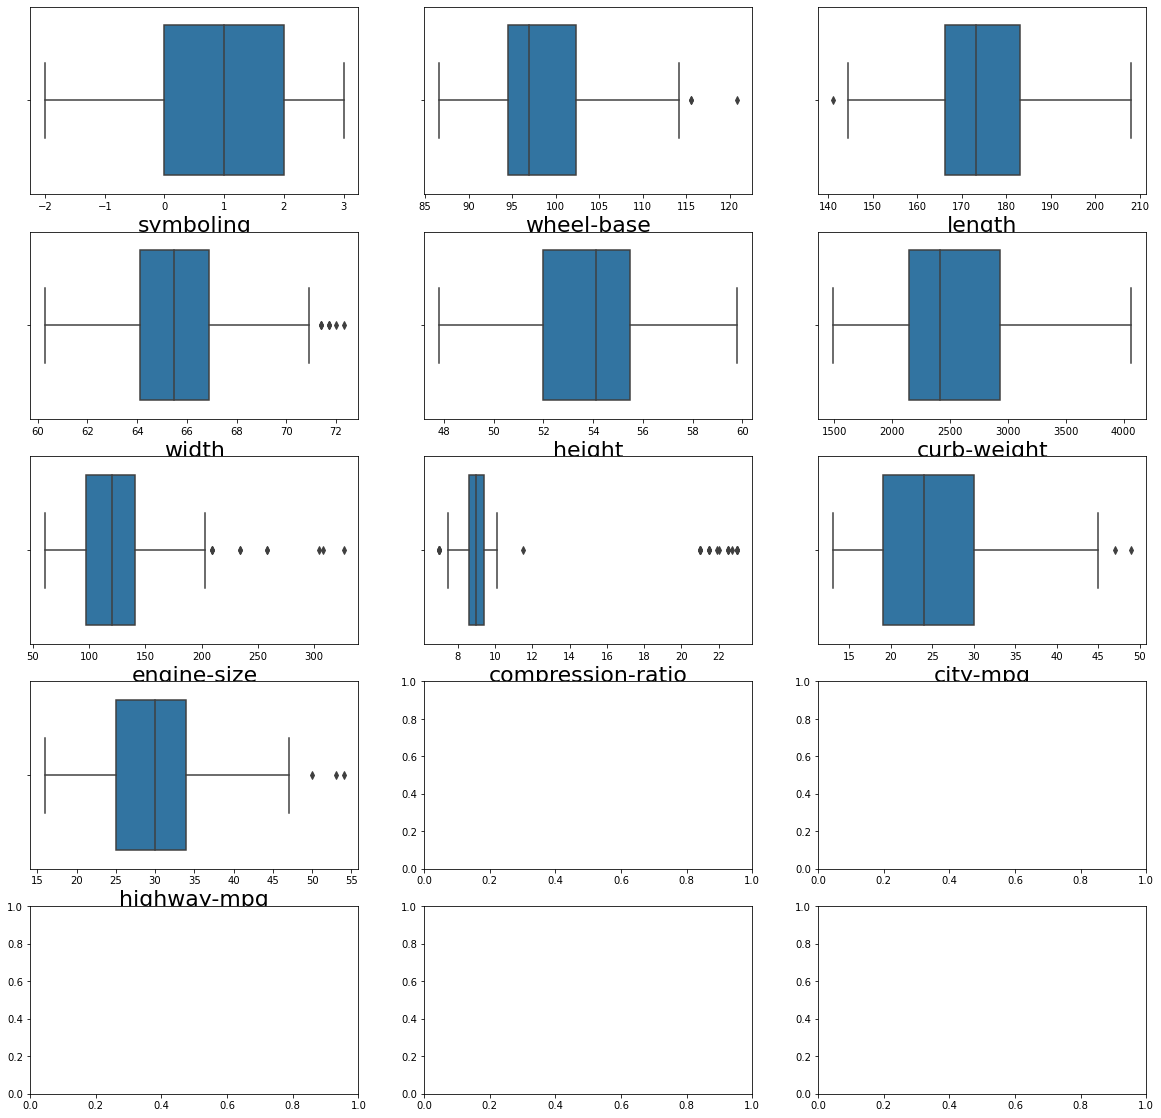

In [168]:
numrical=df.select_dtypes(exclude=object)
fig,ax = plt.subplots(5,3,figsize=(20,20))
for i,j in zip(numrical.columns,ax.flatten()):
    z=sns.boxplot(x=numrical[i],orient='h',ax=j)
    z.set_xlabel(i,fontsize=22)

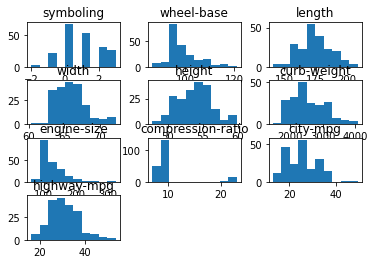

In [169]:
numrical.hist(grid=False)
plt.show()

In [170]:
df.sample()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
92,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849


In [171]:
q1= df['compression-ratio'].quantile(0.25)
q3= df['compression-ratio'].quantile(0.75)
iqr = q3-q1
uppertail = q3+1.5*iqr
lowertail = q1-1.5*iqr
df.loc[~((df['compression-ratio']>uppertail) | (df['compression-ratio']<lowertail))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485


In [172]:
x=df['compression-ratio'].loc[~((df['compression-ratio']>uppertail) | (df['compression-ratio']<lowertail))].mean()

In [173]:
df['compression-ratio'].loc[((df['compression-ratio']>uppertail) | (df['compression-ratio']<lowertail))]=x

In [174]:
df['compression-ratio'].loc[((df['compression-ratio']>uppertail) | (df['compression-ratio']<lowertail))]

Series([], Name: compression-ratio, dtype: float64)

In [175]:
df.loc[~((df['compression-ratio']>uppertail) | (df['compression-ratio']<lowertail))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.000000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.000000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.000000,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.500000,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.700000,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.800000,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,8.918757,106,4800,26,27,22470


In [176]:
_,p_val =shapiro(df['wheel-base'])
if p_val>0.05:
    print("normal")
else:
    print("outliers")

outliers


In [177]:
# z_score = x-xmean\std
xmean = df['engine-size'].mean()
std =np.sqrt(df['engine-size'])

In [178]:
threshold=2
for x in df['engine-size']:
    z_score = (x-xmean)/std
    z_score=np.abs(z_score)
    z_score=np.around(z_score,2)
    if all(z_score)>2:
        print(x)

In [179]:
z_score>2

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: engine-size, Length: 205, dtype: bool

In [180]:
z_score>=2

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: engine-size, Length: 205, dtype: bool

In [181]:
df.iloc[np.where(z_score>2)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [182]:
df['num-of-doors']= df['num-of-doors'].replace(0,'two')

# ordinal_encoding

In [183]:
order =OrdinalEncoder(categories=[['two','four']])
df['num-of-doors']=order.fit_transform(df[['num-of-doors']])

ValueError: Found unknown categories ['?'] in column 0 during fit

In [184]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.000000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.000000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.000000,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.500000,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.700000,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.800000,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,8.918757,106,4800,26,27,22470


In [185]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.000000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.000000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.000000,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.500000,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.700000,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.800000,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,8.918757,106,4800,26,27,22470


In [186]:
from scipy.stats import zscore

In [187]:
score = np.abs(zscore(df['num-of-doors']))
df.iloc[np.where(score>2)]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
score

In [188]:
LabelEncoder().fit_transform(df.aspiration)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1])

In [189]:
x=OneHotEncoder().fit_transform(df[['aspiration']]).toarray()

In [190]:
df[list(df['aspiration'].unique())]= x


In [191]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,std,turbo
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.000000,111,5000,21,27,13495,1.0,0.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.000000,111,5000,21,27,16500,1.0,0.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.000000,154,5000,19,26,16500,1.0,0.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.000000,102,5500,24,30,13950,1.0,0.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.000000,115,5500,18,22,17450,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.500000,114,5400,23,28,16845,1.0,0.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.700000,160,5300,19,25,19045,0.0,1.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.800000,134,5500,18,23,21485,1.0,0.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.4,8.918757,106,4800,26,27,22470,0.0,1.0


In [194]:
pd.get_dummies(df,columns=['fuel-type'],drop_first=True)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,std,turbo,fuel-type_gas
0,3,?,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.000000,111,5000,21,27,13495,1.0,0.0,1
1,3,?,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.000000,111,5000,21,27,16500,1.0,0.0,1
2,1,?,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.000000,154,5000,19,26,16500,1.0,0.0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.4,10.000000,102,5500,24,30,13950,1.0,0.0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.4,8.000000,115,5500,18,22,17450,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.500000,114,5400,23,28,16845,1.0,0.0,1
201,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.700000,160,5300,19,25,19045,0.0,1.0,1
202,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.800000,134,5500,18,23,21485,1.0,0.0,1
203,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.4,8.918757,106,4800,26,27,22470,0.0,1.0,0


In [197]:
pd.get_dummies(df,columns=['make'],drop_first=True)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,?,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,?,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,?,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:ylabel='Density'>

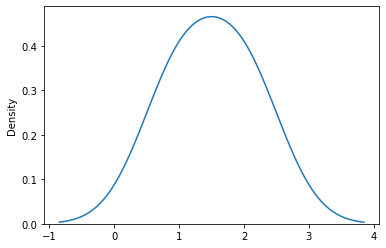

In [199]:
sns.kdeplot([1,2])

In [202]:
import scipy.stats as sts
import statsmodels.api as sm
from scipy.stats import shapiro,kstest,normaltest
_,p_val=kstest(df.length,'norm')

In [203]:
_

1.0

In [213]:
x=[25,7,8,9,5,7,6,8,7,3,5,1,12,36]

In [215]:
sm.qqplot(x,line = '45',dist=sts.norm,fit=True)

AttributeError: 'list' object has no attribute 'shape'